In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve 
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [245]:
path_train ='C:\Users\manra\OneDrive\Desktop\TELA\Churn Data_Praxis_Train.csv'
path_test ='C:\Users\manra\OneDrive\Desktop\TELA\Churn Data_Praxis_Test.csv'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-245-71c5254319b8>, line 1)

In [246]:
a="C:\Users\manra\OneDrive\Desktop\TELA\Churn Data_Praxis_Train.csv"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-246-5f5477f5dbe9>, line 1)

In [262]:
df_train = pd.read_csv(r'C:\Users\manra\OneDrive\Desktop\TELA\Churn Data_Praxis_Train.csv', engine='python')
df_test = pd.read_csv(r'C:\Users\manra\OneDrive\Desktop\TELA\Churn Data_Praxis_Test.csv', engine='python')

In [263]:
df_train.head()

State  Account Length  Area Code      Phone Int'l Plan VMail Plan  \
0    KS             128        415   382-4657         no        yes   
1    AL             118        510   391-8027        yes         no   
2    MA             121        510   355-9993         no        yes   
3    MO             147        415   329-9001        yes         no   
4    LA             117        408   335-4719         no         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1              0     223.4         98       37.98  ...        101       18.75   
2             24     218.2         88       37.09  ...        108       29.62   
3              0     157.0         79       26.69  ...         94        8.76   
4              0     184.5         97       31.37  ...         80       29.89   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       203.9          118          9.18        6.3           6         1.70   
2       212.6          118          9.57        7.5           7         2.03   
3       211.8           96          9.53        7.1           6         1.92   
4       215.8           90          9.71        8.7           4         2.35   

   CustServ Calls  Churn?  
0               1      No  
1               0      No  
2               3      No  
3               0      No  
4               1      No  

[5 rows x 21 columns]

In [264]:
df_test.head()

State  Account Length  Area Code      Phone Int'l Plan VMail Plan  \
0    OH             107        415   371-7191         no        yes   
1    NJ             137        415   358-1921         no         no   
2    OH              84        408   375-9999        yes         no   
3    OK              75        415   330-6626        yes         no   
4    IN              65        415   329-6603         no         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             26     161.6        123       27.47  ...        103       16.62   
1              0     243.4        114       41.38  ...        110       10.30   
2              0     299.4         71       50.90  ...         88        5.26   
3              0     166.7        113       28.34  ...        122       12.61   
4              0     129.1        137       21.95  ...         83       19.42   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       254.4          103         11.45       13.7           3         3.70   
1       162.6          104          7.32       12.2           5         3.29   
2       196.9           89          8.86        6.6           7         1.78   
3       186.9          121          8.41       10.1           3         2.73   
4       208.8          111          9.40       12.7           6         3.43   

   CustServ Calls  Churn?  
0               1      No  
1               0      No  
2               2      No  
3               3      No  
4               4     Yes  

[5 rows x 21 columns]

In [265]:
print(df_train.shape, df_test.shape)

(2650, 21) (683, 21)


In [266]:
df_train.describe()

Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     2650.000000  2650.000000    2650.000000  2650.000000  2650.000000   
mean       100.689811   437.778868       7.998868   179.124717   100.122642   
std         39.640652    42.744990      13.576997    54.226547    20.125457   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         73.000000   408.000000       0.000000   143.200000    87.000000   
50%        100.000000   415.000000       0.000000   179.300000   100.000000   
75%        127.000000   510.000000      19.000000   215.475000   114.000000   
max        243.000000   510.000000      50.000000   350.800000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  2650.000000  2650.000000  2650.000000  2650.000000  2650.000000   
mean     30.451743   200.824755   100.163396    17.070294   200.584302   
std       9.218476    50.477265    19.836499     4.290586    50.942518   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.340000   167.200000    87.000000    14.210000   166.700000   
50%      30.480000   201.150000   100.000000    17.095000   200.850000   
75%      36.635000   235.275000   113.000000    19.997500   235.250000   
max      59.640000   363.700000   170.000000    30.910000   395.000000   

       Night Calls  Night Charge    Intl Mins   Intl Calls  Intl Charge  \
count  2650.000000   2650.000000  2650.000000  2650.000000  2650.000000   
mean    100.227170      9.026366    10.228755     4.413208     2.762215   
std      19.734528      2.292422     2.804509     2.440576     0.757137   
min      33.000000      1.040000     0.000000     0.000000     0.000000   
25%      87.000000      7.500000     8.500000     3.000000     2.300000   
50%     101.000000      9.040000    10.300000     4.000000     2.780000   
75%     114.000000     10.587500    12.000000     6.000000     3.240000   
max     175.000000     17.770000    20.000000    20.000000     5.400000   

       CustServ Calls  
count     2650.000000  
mean         1.558868  
std          1.331915  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

In [267]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 21 columns):
State             2650 non-null object
Account Length    2650 non-null int64
Area Code         2650 non-null int64
Phone             2650 non-null object
Int'l Plan        2650 non-null object
VMail Plan        2650 non-null object
VMail Message     2650 non-null int64
Day Mins          2650 non-null float64
Day Calls         2650 non-null int64
Day Charge        2650 non-null float64
Eve Mins          2650 non-null float64
Eve Calls         2650 non-null int64
Eve Charge        2650 non-null float64
Night Mins        2650 non-null float64
Night Calls       2650 non-null int64
Night Charge      2650 non-null float64
Intl Mins         2650 non-null float64
Intl Calls        2650 non-null int64
Intl Charge       2650 non-null float64
CustServ Calls    2650 non-null int64
Churn?            2650 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 434.8+ KB


We need to drop the columns State (51 states in the dataset) and Phone(2650 unique phone numbers). We will also label encode Int'l Plan and VMail Plan as they have only two values: 'yes', and 'no.

In [268]:
for col in df_train.columns:
    print(col, df_train[col].nunique())
    print(df_train[col].unique())

State 51
['KS' 'AL' 'MA' 'MO' 'LA' 'WV' 'RI' 'IA' 'MT' 'NY' 'VT' 'VA' 'FL' 'CO'
 'AZ' 'SC' 'WY' 'HI' 'IL' 'OK' 'GA' 'AK' 'MD' 'AR' 'ID' 'WI' 'OR' 'DE'
 'IN' 'CA' 'MN' 'SD' 'WA' 'UT' 'TX' 'NJ' 'NM' 'NV' 'DC' 'KY' 'ME' 'MS'
 'MI' 'NE' 'OH' 'NH' 'TN' 'PA' 'CT' 'NC' 'ND']
Account Length 208
[128 118 121 147 117 141  74 168  95  62 161  93  76  77 130 111 132  57
  54  20  49 142 172  72  36  98 135  34 160  64  59 119  97  52  60  10
  87  81 174 116 149  40  43 113 126 150 138 162  90  50  82  70 144  55
 106 155  80  78 104  99 120 108 122 157 103 125  63  46  41  85  61  92
 131 163  91  75 127  83 145  65  56  96 151 139   6 146 148  94  32  68
  25  19 170  51 107 208  53 105  66  38  86 136  88 123  45 100 110 215
  73 137  22  33 114  24 143  48  71  89 199 166  67 158 196 112 209  16
 173 129 101  44  79  31 124  37  39 154  84  35 133 224 115 140  58  11
 165  18 109 193  30 176  47 194 190 152  26 171 102  28 153 169  13  27
   3  42 189 156  69 179 167 243 134  23   1 205 200   

# Visualization

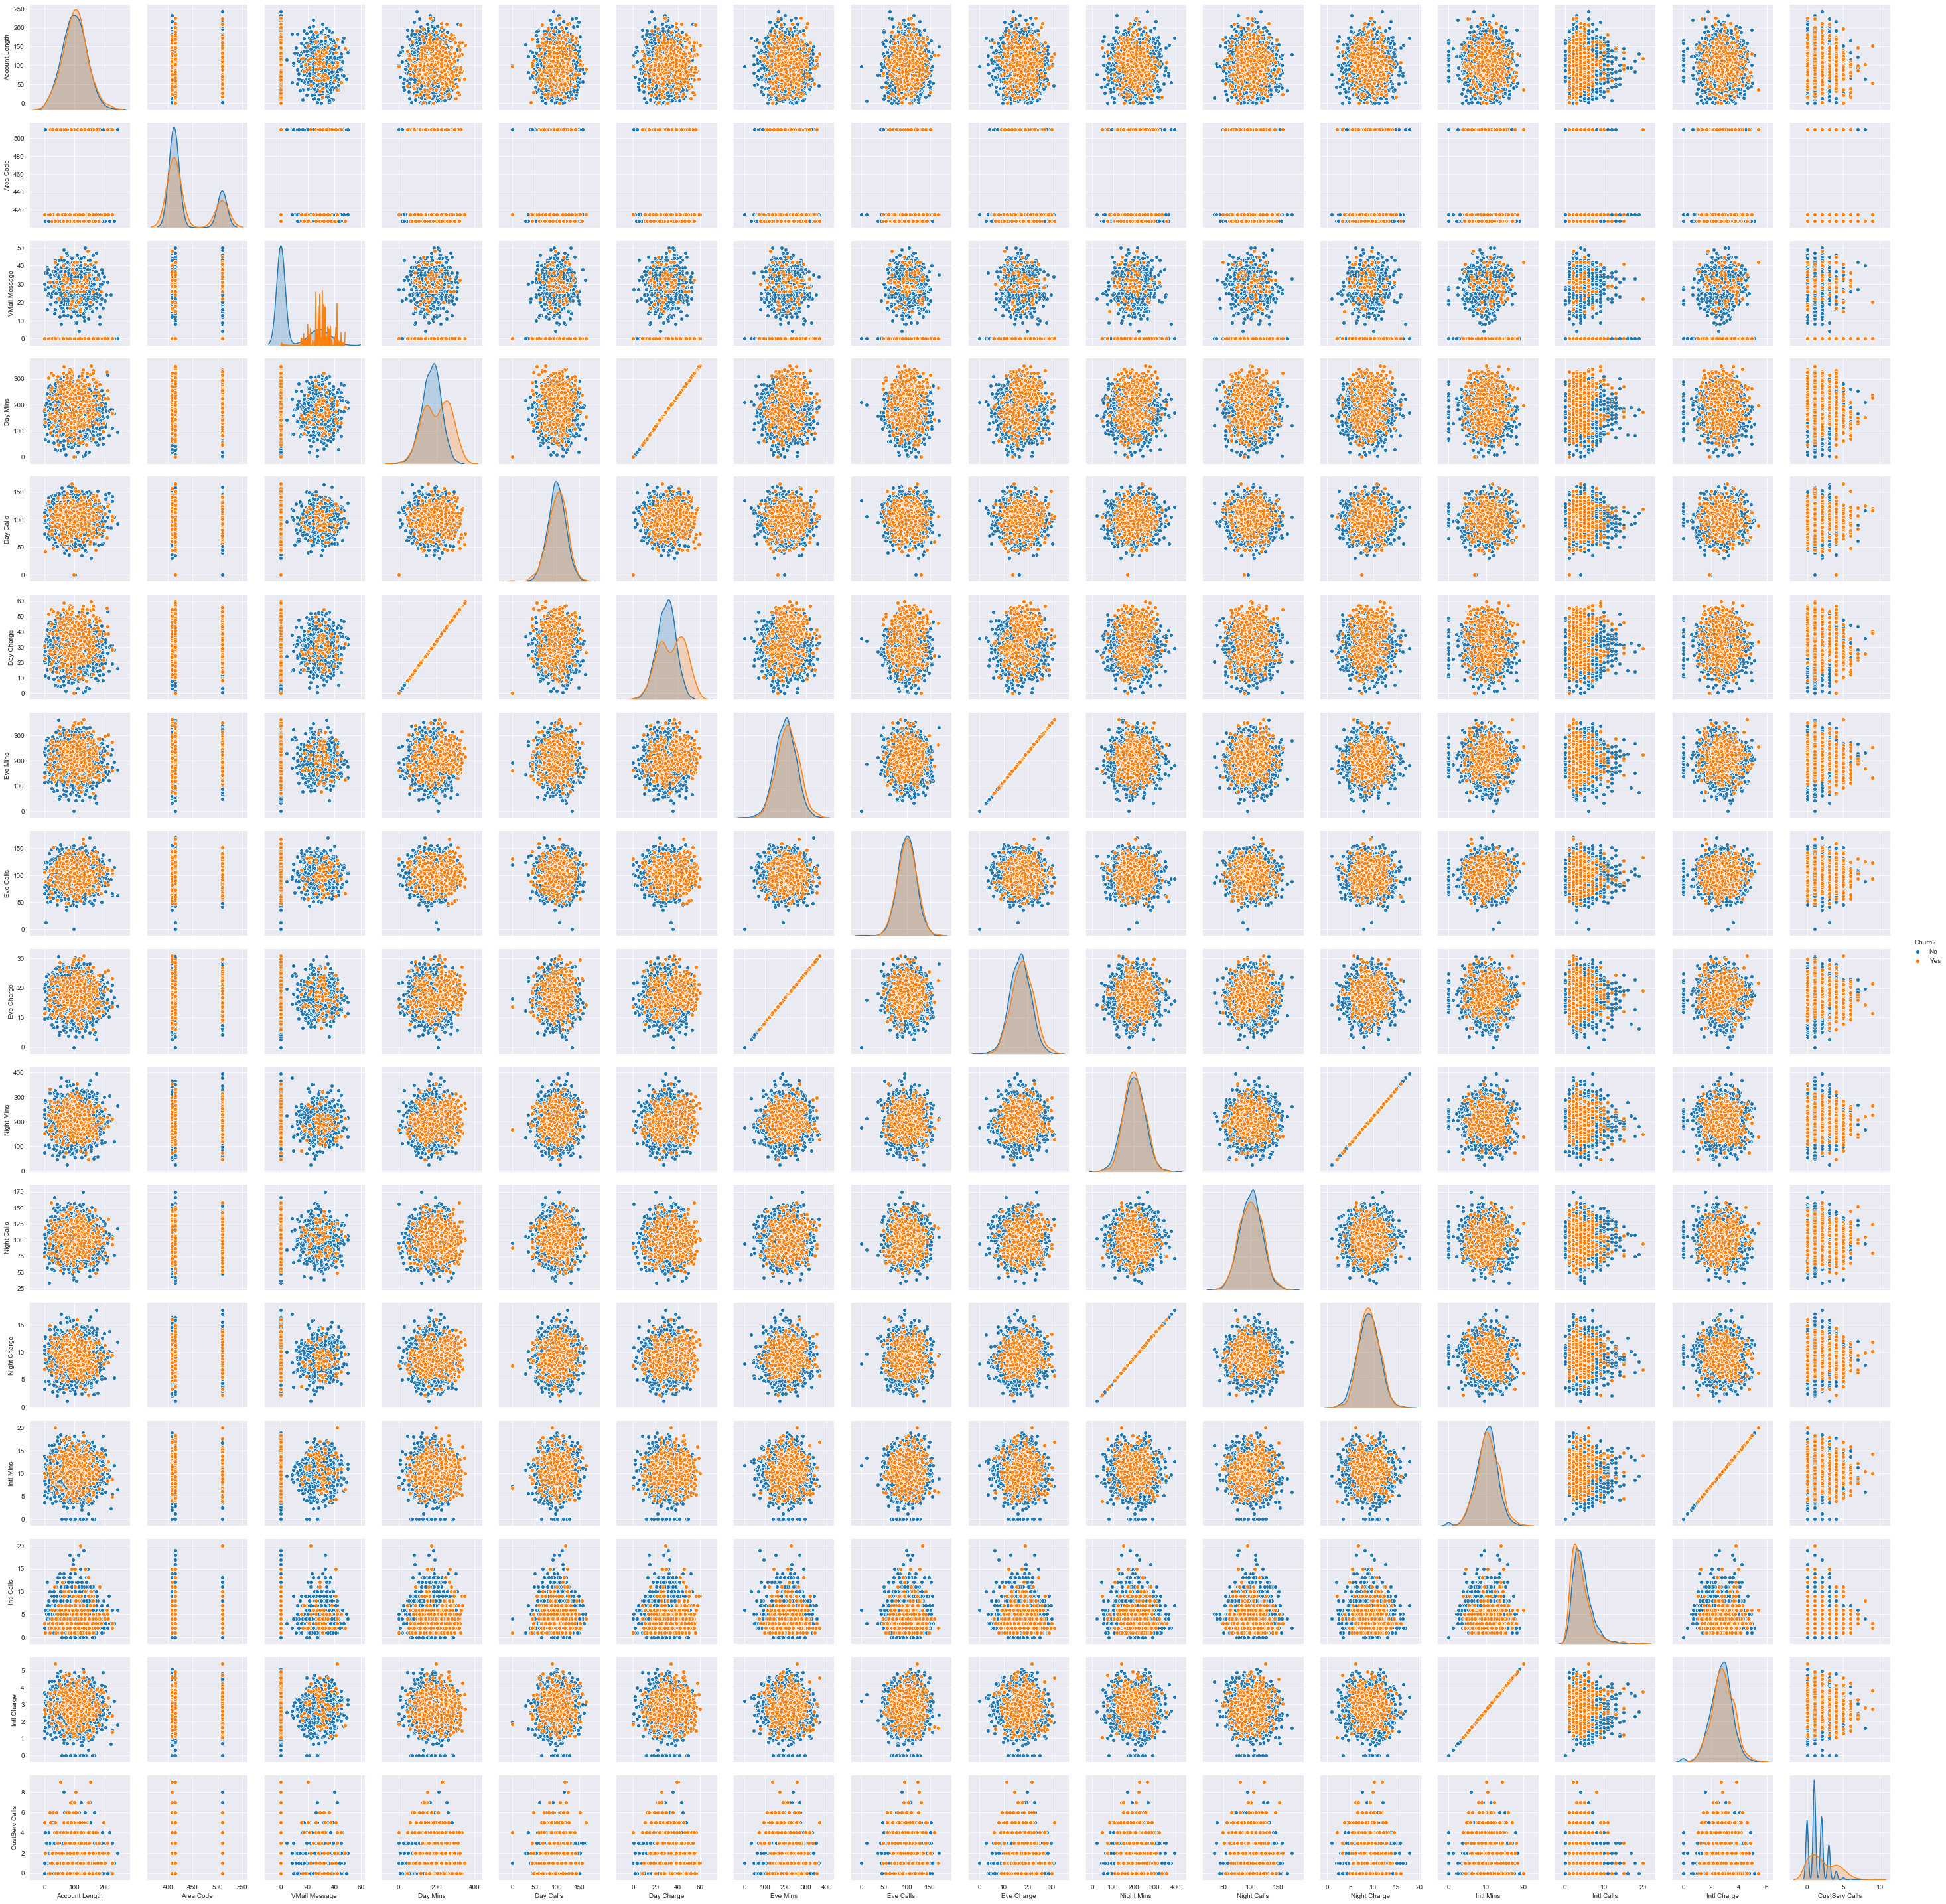

In [269]:
sns.pairplot(df_train, hue="Churn?")

There is a clear correlation between the variables:
1. Day Charge and Day Mins
2. Eve Charge and Eve Mins
3. Night Charge and Night Mins
4. Intl Charge and Intl Mins

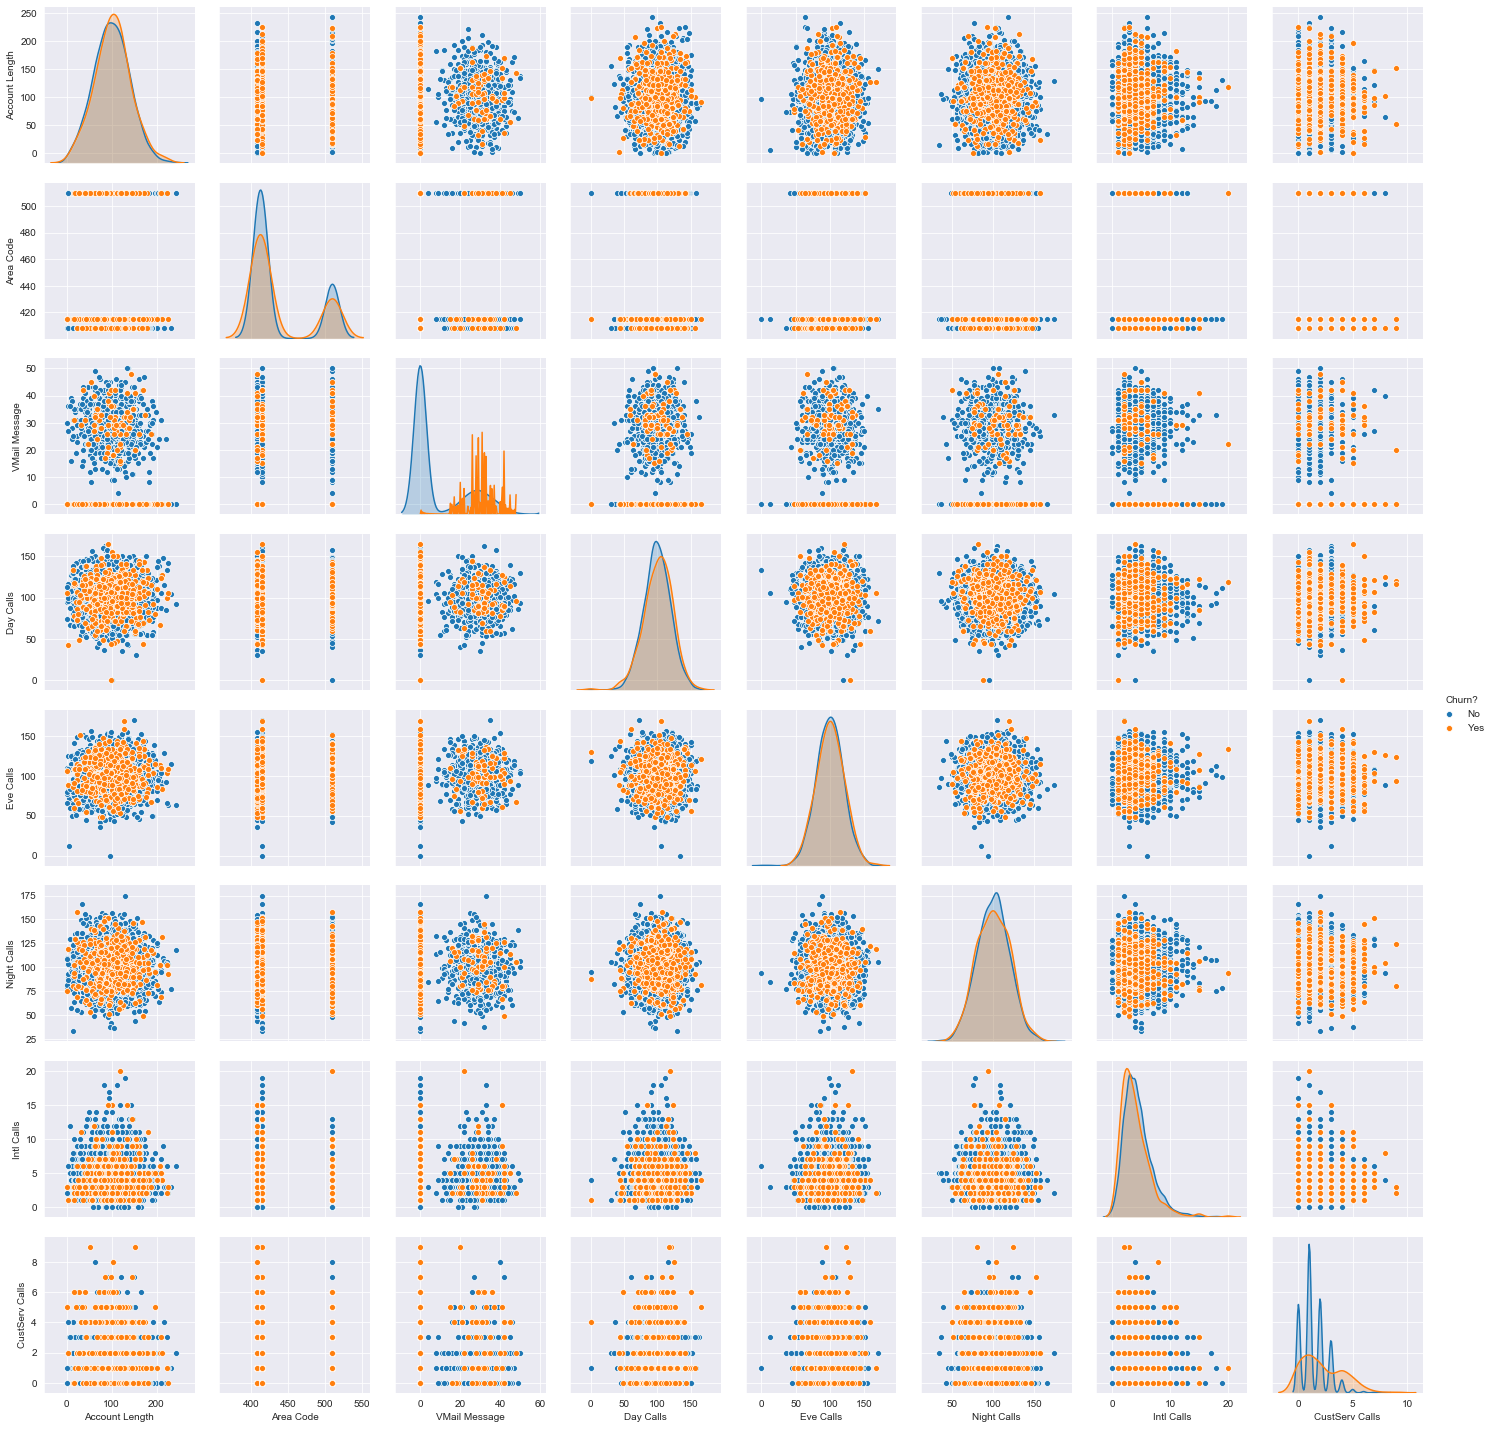

In [255]:
sns.pairplot(df_train.drop(['Day Charge', 'Day Mins','Eve Charge','Eve Mins','Night Charge','Night Mins', 'Intl Charge','Intl Mins'],axis=1), hue="Churn?")
plt.savefig("figure.png")

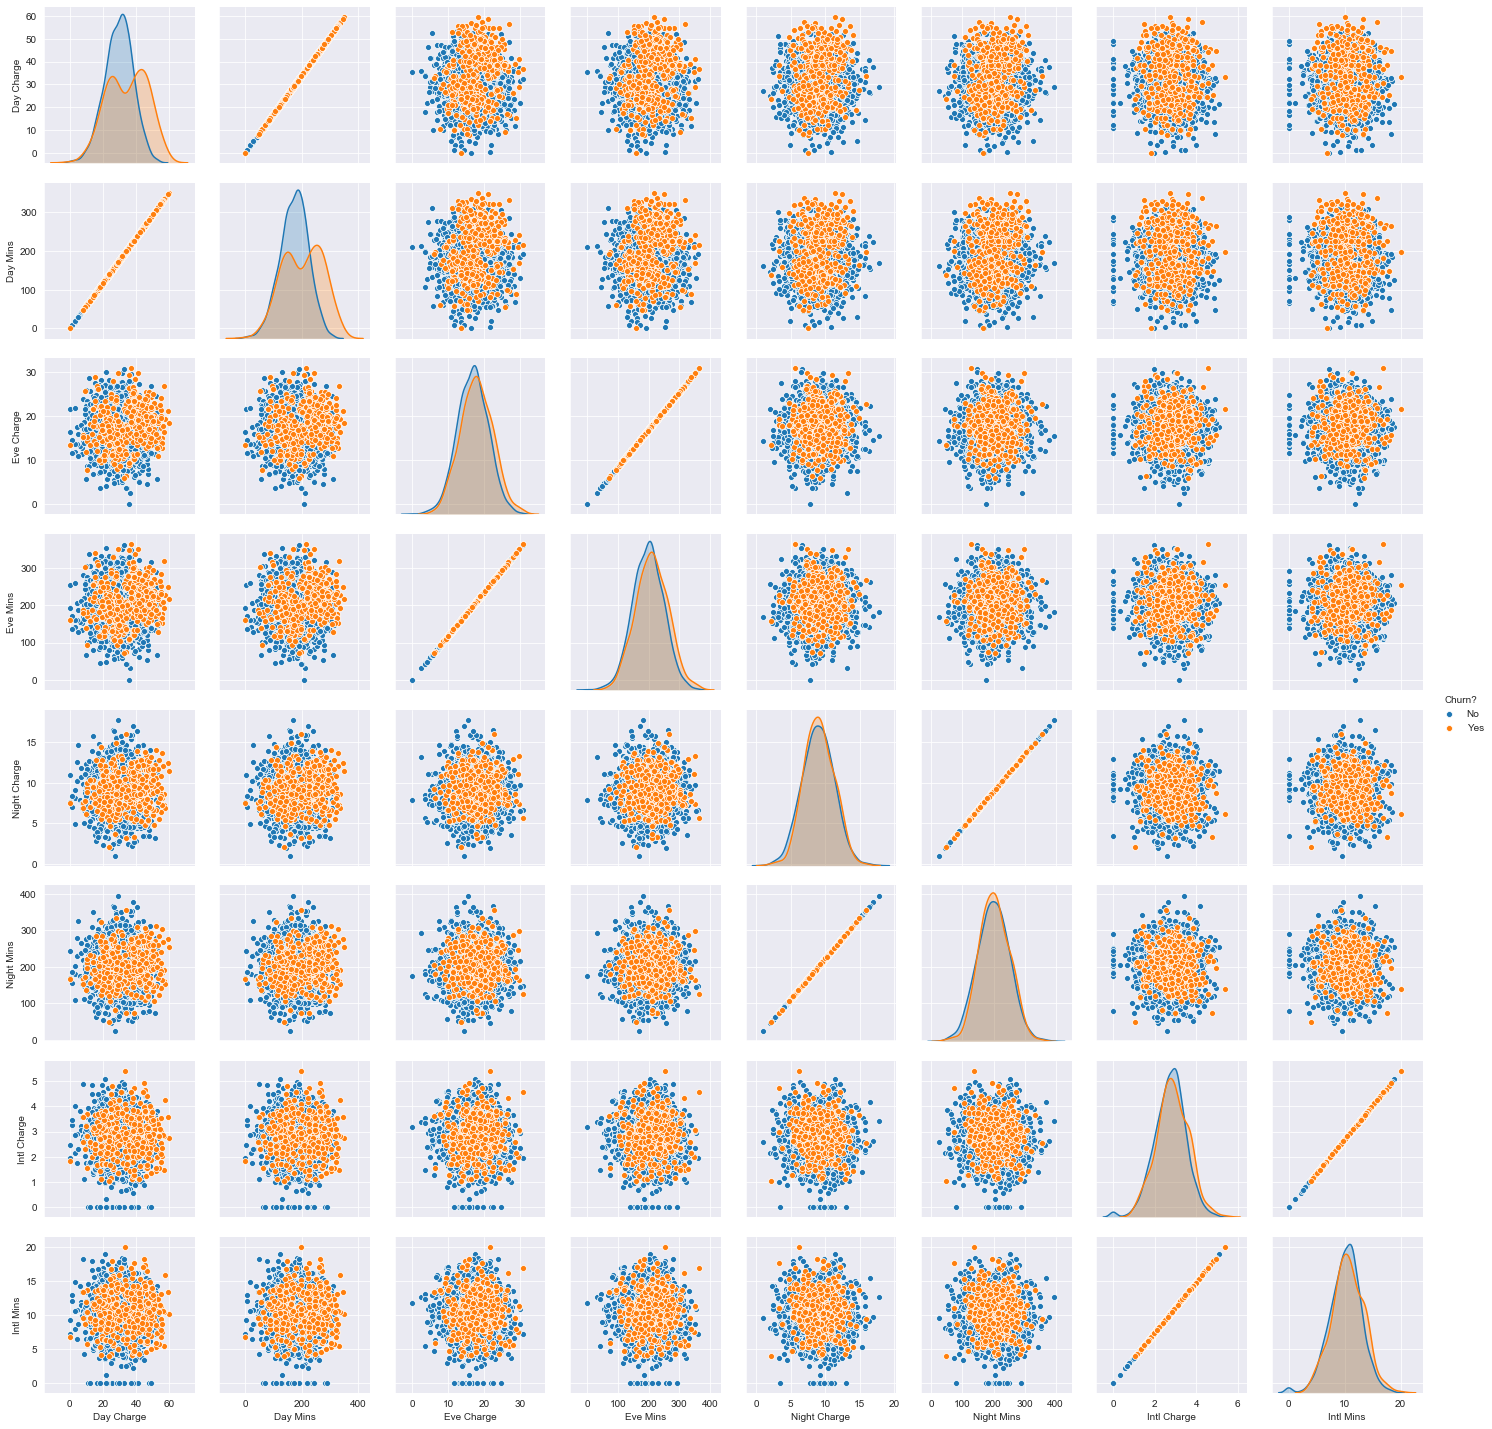

In [256]:
sns.pairplot(df_train[['Day Charge', 'Day Mins','Eve Charge','Eve Mins','Night Charge','Night Mins', 'Intl Charge','Intl Mins','Churn?']], hue="Churn?")

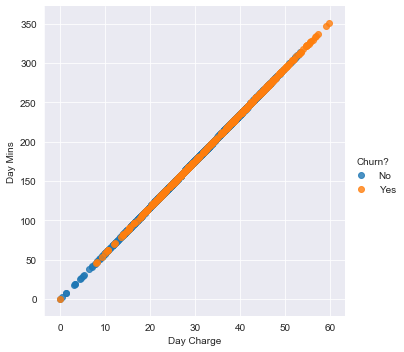

In [257]:
sns.lmplot(data=df_train, x='Day Charge', y='Day Mins', hue='Churn?',fit_reg=False)
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure.png")

<Figure size 1440x720 with 0 Axes>

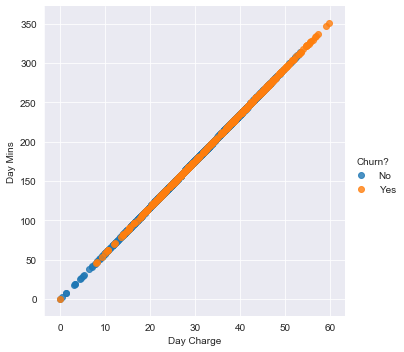

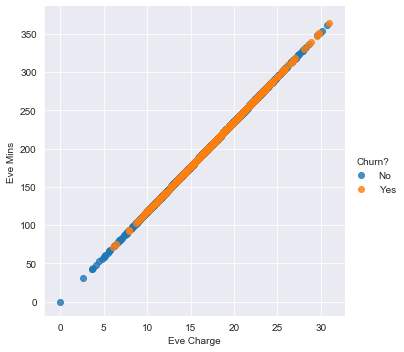

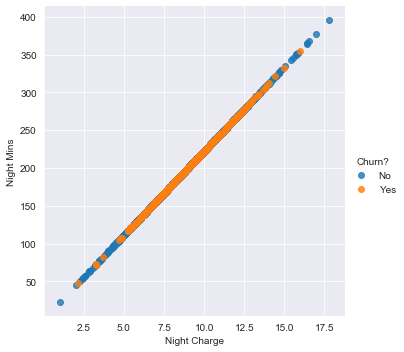

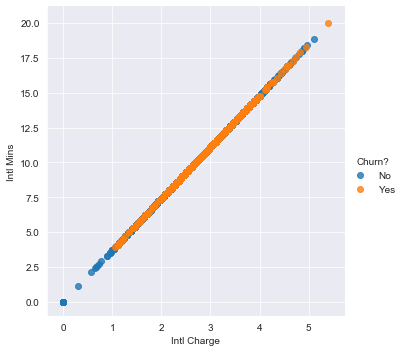

<Figure size 432x288 with 0 Axes>

In [258]:
plt.figure(figsize=(20,10))

sns.lmplot(data=df_train, x='Day Charge', y='Day Mins', hue='Churn?',fit_reg=False)

sns.lmplot(data=df_train, x='Eve Charge', y='Eve Mins', hue='Churn?',fit_reg=False,)

sns.lmplot(data=df_train, x='Night Charge', y='Night Mins', hue='Churn?',fit_reg=False,)

sns.lmplot(data=df_train, x='Intl Charge', y='Intl Mins', hue='Churn?',fit_reg=False,)

plt.show()
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure.png")

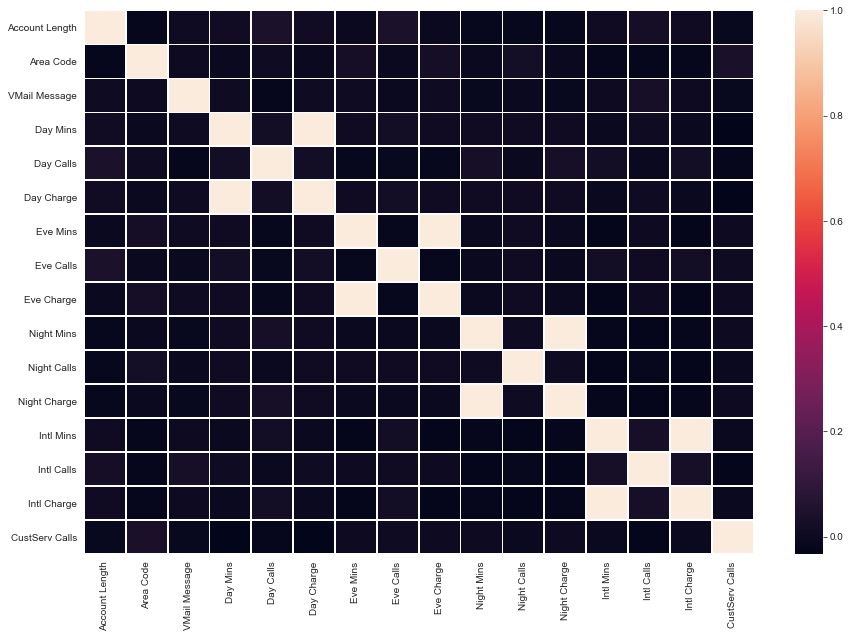

In [259]:
corr = df_train.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.75)

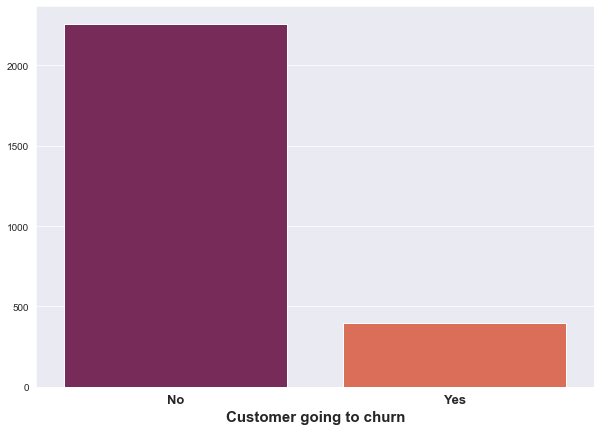

In [298]:
sns.set_style('darkgrid')
y = df_train["Churn?"].value_counts()
sns.barplot(y.index, y.values,palette='rocket')

plt.xlabel("Customer going to churn",fontsize=15,fontweight='bold')
plt.xticks(fontsize=13,fontweight='bold')
plt.show()

Our dataset is imbalanced with only 14.9% of data indicating churn.

In [299]:
print(y)
print('Percentage of churning customers: {:.2f}%'.format(y[1]*100/len(df_train)))

No     2255
Yes     395
Name: Churn?, dtype: int64
Percentage of churning customers: 14.91%


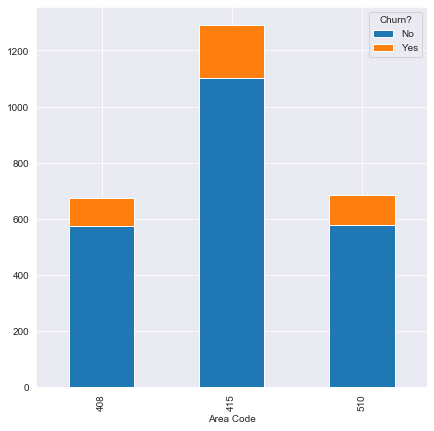

In [300]:
df_train.groupby(["Area Code", "Churn?"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7)) 
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure.png")

In [301]:
df_train.groupby(["Area Code", "Churn?"]).size()

Area Code  Churn?
408        No         574
           Yes         99
415        No        1103
           Yes        189
510        No         578
           Yes        107
dtype: int64

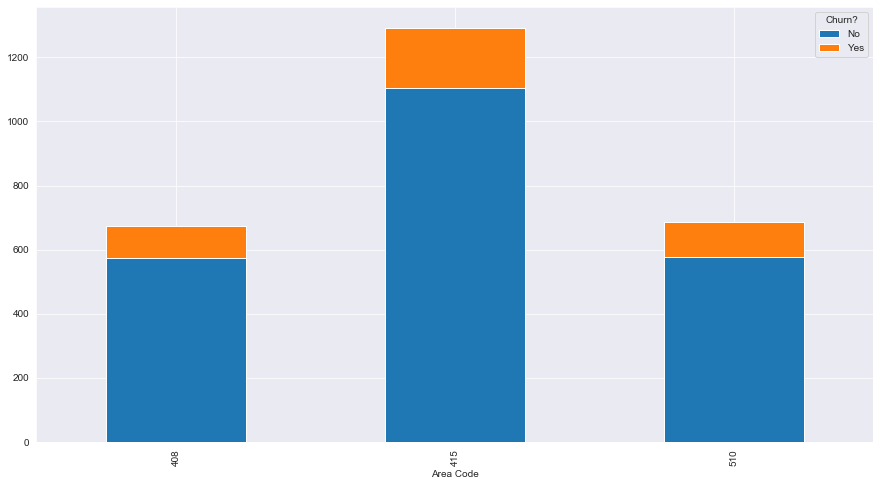

In [302]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)
df_train.groupby(["Area Code", "Churn?"]).size().unstack().plot.bar(stacked=True)
plt.show()

Higher ratio of customers have churned from area code 510 (15.6%) as opposed to other areas. The company may need to investigate this observation.

In [303]:
C1 = pd.DataFrame(pd.crosstab(df_train["Area Code"], df_train["Churn?"], normalize=False))
C1['Ratio'] = C1.iloc[:,1]/(C1.iloc[:,0]+C1.iloc[:,1])
C1

Churn?       No  Yes     Ratio
Area Code                     
408         574   99  0.147103
415        1103  189  0.146285
510         578  107  0.156204

Customers with International Plan are more likely to churn. There may be some issue with company's International Plans.

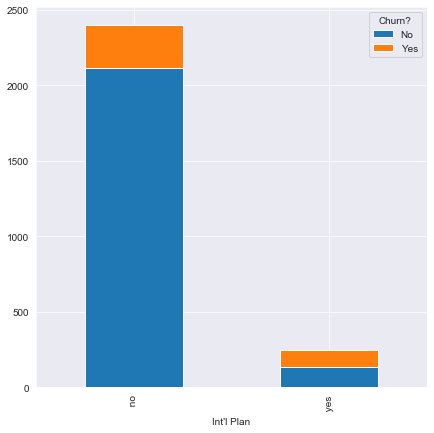

In [304]:
df_train.groupby(["Int'l Plan", "Churn?"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7)) 
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure.png")

A staggering 45.2% of customers having International Plan churned as opposed to 11.75% of customers who did not have International Plan.

In [305]:
C2 = pd.DataFrame(pd.crosstab(df_train["Int'l Plan"], df_train["Churn?"], normalize=False))
C2['Ratio'] = C2.iloc[:,1]/(C2.iloc[:,0]+C2.iloc[:,1])
C2

Churn?        No  Yes   Ratio
Int'l Plan                   
 no         2118  282  0.1175
 yes         137  113  0.4520

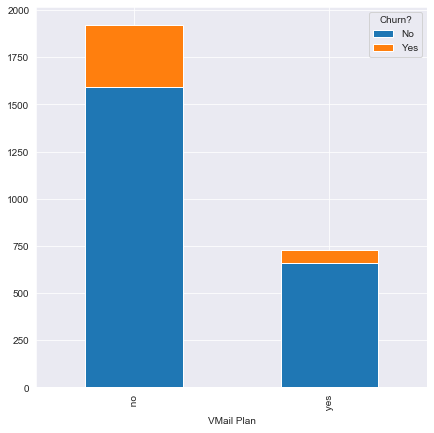

In [306]:
df_train.groupby(["VMail Plan", "Churn?"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7)) 
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure.png")

17% of customers having no Voice Mail Plan churned as opposed to 9% of those who had.

In [307]:
C3 = pd.DataFrame(pd.crosstab(df_train["VMail Plan"], df_train["Churn?"], normalize=False))
C3['Ratio'] = C3.iloc[:,1]/(C3.iloc[:,0]+C3.iloc[:,1])
C3

Churn?        No  Yes     Ratio
VMail Plan                     
 no         1593  328  0.170744
 yes         662   67  0.091907

Call Charges do not seem to identify with the churning rate.

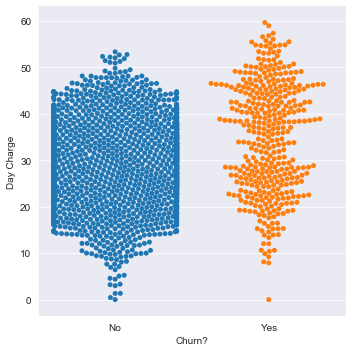

In [308]:
sns.catplot(x='Churn?', y='Day Charge', kind="swarm", data=df_train)
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure1.png")

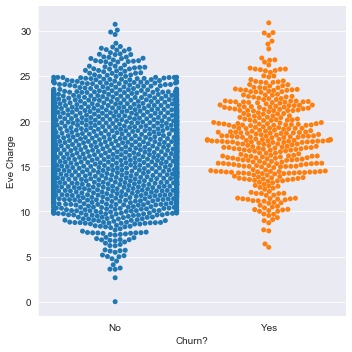

In [309]:
sns.catplot(x='Churn?', y='Eve Charge', kind="swarm", data=df_train)
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure2.png")

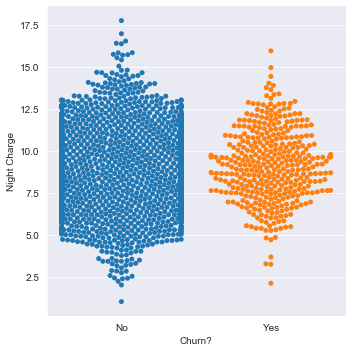

In [310]:
sns.catplot(x='Churn?', y='Night Charge', kind="swarm", data=df_train)
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure3.png")

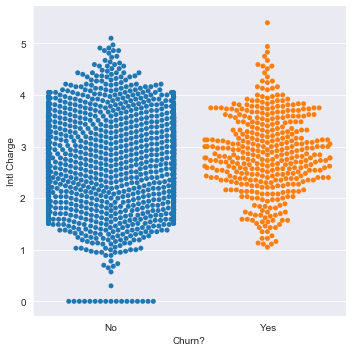

In [311]:
sns.catplot(x='Churn?', y="Intl Charge", kind="swarm", data=df_train)
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure4.png")

In [312]:
df_train['Day Charge'].values.shape

(2650,)

In [313]:
pd.get_dummies(df_train['Churn?'],drop_first=True).values.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [314]:
pd.DataFrame(np.corrcoef(y=pd.get_dummies(df_train['Churn?'],drop_first=True).values.flatten(),x=df_train['Day Charge'].values))

0         1
0  1.000000  0.198377
1  0.198377  1.000000

Customers who have had to call the Customer Service 4 times or more have churned in large proportions (at least 44.7%).

In [315]:
C4 = pd.crosstab(df_train["CustServ Calls"], df_train["Churn?"], normalize=False)
C4['Ratio'] = C4.iloc[:,1]/(C4.iloc[:,0]+C4.iloc[:,1])
C4

Churn?           No  Yes     Ratio
CustServ Calls                    
0               491   80  0.140105
1               833   94  0.101402
2               531   71  0.117940
3               297   35  0.105422
4                73   59  0.446970
5                19   37  0.660714
6                 7   13  0.650000
7                 3    3  0.500000
8                 1    1  0.500000
9                 0    2  1.000000

In [316]:
temp=df_train.groupby(['CustServ Calls','Churn?']).agg({'Churn?':'count'})
temp=temp.rename({'Churn?':'Churn'},axis=1).reset_index()
temp

CustServ Calls Churn?  Churn
0                0     No    491
1                0    Yes     80
2                1     No    833
3                1    Yes     94
4                2     No    531
5                2    Yes     71
6                3     No    297
7                3    Yes     35
8                4     No     73
9                4    Yes     59
10               5     No     19
11               5    Yes     37
12               6     No      7
13               6    Yes     13
14               7     No      3
15               7    Yes      3
16               8     No      1
17               8    Yes      1
18               9    Yes      2

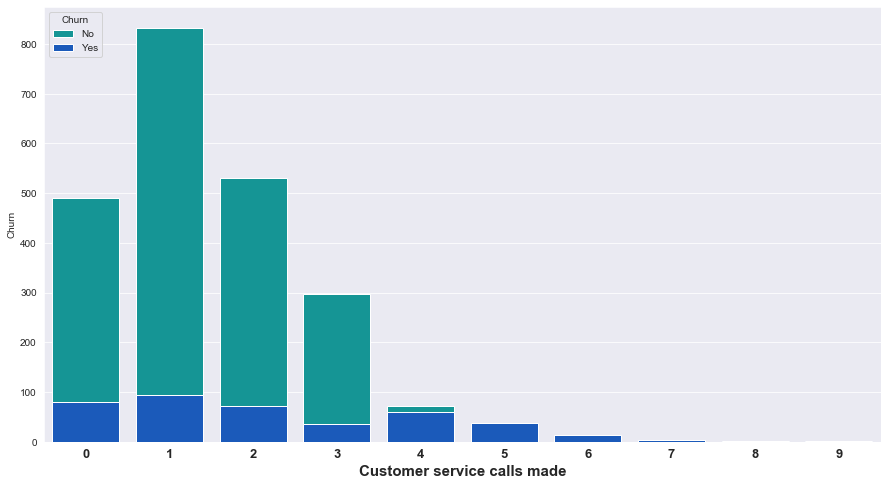

In [317]:
sns.barplot(data=temp,x='CustServ Calls',y='Churn',hue='Churn?',palette='winter_r',dodge=False)
plt.xlabel("Customer service calls made",fontsize=15,fontweight='bold')
plt.xticks(fontsize=13,fontweight='bold')
plt.legend(title='Churn',fancybox=True)
plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure.png")

# Pre-processing

In [270]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
sc = StandardScaler()

In [271]:
def processing(df):
    df = pd.DataFrame(df)
    df = df.drop(columns=['State', 'Phone'])
    df["Int'l Plan"]=le.fit_transform(df["Int'l Plan"])
    df["VMail Plan"]=le.fit_transform(df["VMail Plan"])
    df['Area Code'] = df['Area Code'].astype(str)
    df = pd.get_dummies(df)
    df = sc.fit_transform(df)
    
    return df

In [272]:
def processing3(df):
    df = pd.DataFrame(df)
    df = df.drop(columns=['State', 'Phone'])
    df["Int'l Plan"]=le.fit_transform(df["Int'l Plan"])
    df["VMail Plan"]=le.fit_transform(df["VMail Plan"])
    df['Area Code'] = df['Area Code'].astype(str)
    df = pd.get_dummies(df)    
    return df

In [273]:
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
y_test = df_test.iloc[:,-1]

In [274]:
X_train.head()

State  Account Length  Area Code      Phone Int'l Plan VMail Plan  \
0    KS             128        415   382-4657         no        yes   
1    AL             118        510   391-8027        yes         no   
2    MA             121        510   355-9993         no        yes   
3    MO             147        415   329-9001        yes         no   
4    LA             117        408   335-4719         no         no   

   VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
0             25     265.1        110       45.07     197.4         99   
1              0     223.4         98       37.98     220.6        101   
2             24     218.2         88       37.09     348.5        108   
3              0     157.0         79       26.69     103.1         94   
4              0     184.5         97       31.37     351.6         80   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       18.75       203.9          118          9.18        6.3           6   
2       29.62       212.6          118          9.57        7.5           7   
3        8.76       211.8           96          9.53        7.1           6   
4       29.89       215.8           90          9.71        8.7           4   

   Intl Charge  CustServ Calls  
0         2.70               1  
1         1.70               0  
2         2.03               3  
3         1.92               0  
4         2.35               1

In [275]:
X_train1 = processing(X_train)
X_test1 = processing(X_test)
y_tr = le.fit_transform(y_train)
y_ts = le.fit_transform(y_test)

In [276]:
X_train3 = processing3(X_train)
X_train3.head()

Account Length  Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  \
0             128           0           1             25     265.1        110   
1             118           1           0              0     223.4         98   
2             121           0           1             24     218.2         88   
3             147           1           0              0     157.0         79   
4             117           0           0              0     184.5         97   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       37.98     220.6        101       18.75       203.9          118   
2       37.09     348.5        108       29.62       212.6          118   
3       26.69     103.1         94        8.76       211.8           96   
4       31.37     351.6         80       29.89       215.8           90   

   Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  \
0         11.01       10.0           3         2.70               1   
1          9.18        6.3           6         1.70               0   
2          9.57        7.5           7         2.03               3   
3          9.53        7.1           6         1.92               0   
4          9.71        8.7           4         2.35               1   

   Area Code_408  Area Code_415  Area Code_510  
0              0              1              0  
1              0              0              1  
2              0              0              1  
3              0              1              0  
4              1              0              0

In [277]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train1, y_tr)

In [278]:
from collections import Counter

In [279]:
Counter(y_tr)

Counter({0: 2255, 1: 395})

In [280]:
Counter(y_ts)

Counter({0: 595, 1: 88})

In [281]:
Counter(y_train_res)

Counter({0: 2255, 1: 2255})

# Models


Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.35      0.52       595
           1       0.18      0.95      0.30        88

    accuracy                           0.43       683
   macro avg       0.58      0.65      0.41       683
weighted avg       0.88      0.43      0.49       683

Confusion Matrix: 

[[211 384]
 [  4  84]]

roc_auc_score for GradientBoostingClassifier:  0.8935255920550039


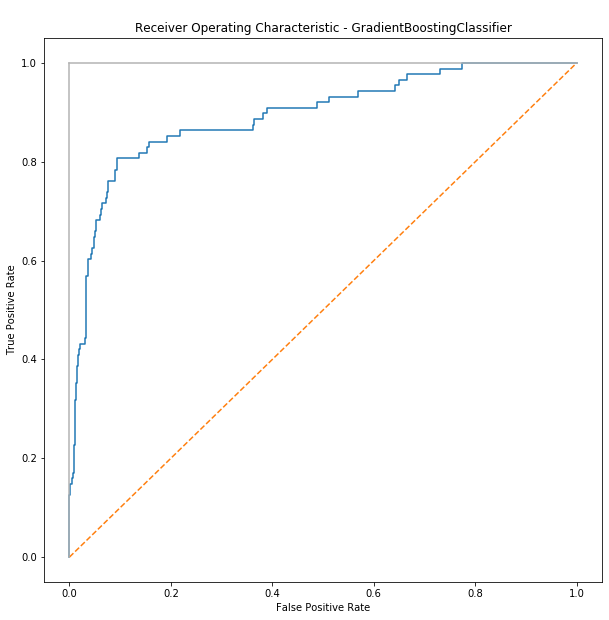

Important Features:


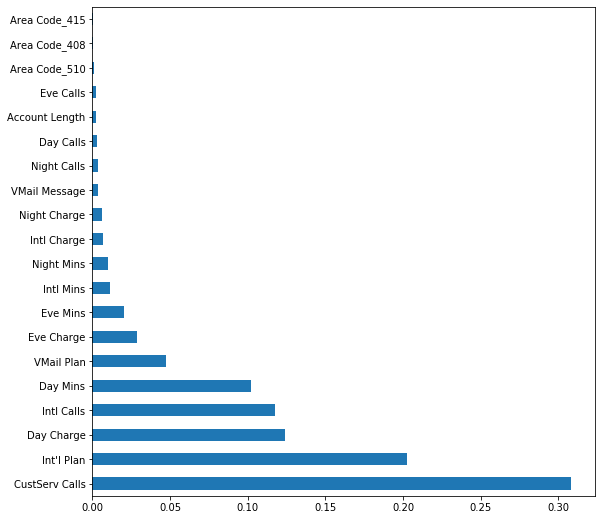

In [37]:
model = GradientBoostingClassifier()
model.fit(X_train_res, y_train_res)
y_model = model.predict(X_test1)
y_model_proba = model.predict_proba(X_test1)[:,1]
print('\nClassification Report: \n')
print(classification_report(y_ts, y_model))
print('Confusion Matrix: \n')
print(confusion_matrix(y_ts, y_model))
fpr, tpr, threshold1 = roc_curve(y_ts, y_model_proba)
print('\nroc_auc_score for GradientBoostingClassifier: ', roc_auc_score(y_ts, y_model_proba))
plt.subplots(1, figsize=(10,10))
plt.title('\nReceiver Operating Characteristic - GradientBoostingClassifier')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Important Features:')
feat_importances = pd.Series(model.feature_importances_, index=X_train3.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(9,9))
plt.show()

In [38]:
from sklearn.feature_selection import RFE

Classification Report: 

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       595
           1       0.31      0.74      0.44        88

    accuracy                           0.76       683
   macro avg       0.63      0.75      0.64       683
weighted avg       0.87      0.76      0.79       683

Confusion Matrix: 

[[451 144]
 [ 23  65]]

roc_auc_score for GradientBoostingClassifier:  0.815488922841864


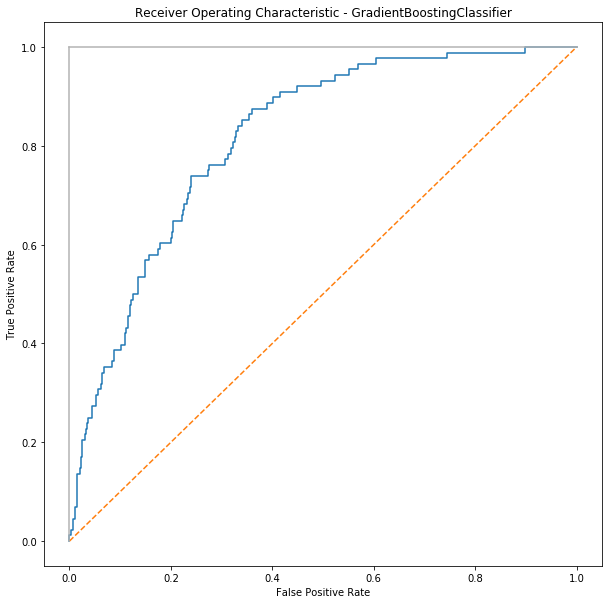

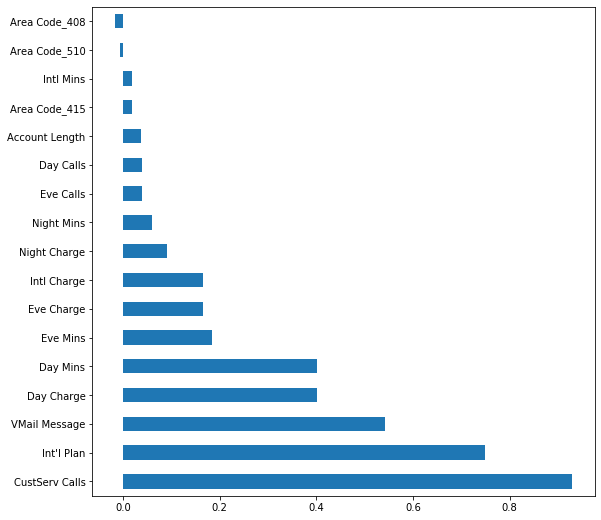

In [39]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(X_train_res, y_train_res)
y_model2 = logit.predict(X_test1)
y_model2_proba = logit.predict_proba(X_test1)[:,1]
print('Classification Report: \n')
print(classification_report(y_ts, y_model2))
print('Confusion Matrix: \n')
print(confusion_matrix(y_ts, y_model2))
fpr, tpr, threshold1 = roc_curve(y_ts, y_model2_proba)
print('\nroc_auc_score for GradientBoostingClassifier: ', roc_auc_score(y_ts, y_model2_proba))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - GradientBoostingClassifier')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#print(logit.support_)
#print(logit.coef_)
#print('Important Features:')
feat_importances = pd.Series(logit.coef_[0], index=X_train3.columns)
feat_importances.nlargest(17).plot(kind='barh', figsize=(9,9))
plt.show()

Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       595
           1       0.48      0.80      0.60        88

    accuracy                           0.86       683
   macro avg       0.72      0.83      0.76       683
weighted avg       0.90      0.86      0.87       683

Confusion Matrix: 

[[518  77]
 [ 18  70]]

roc_auc_score for SupportVectorMachine:  0.8916443850267379


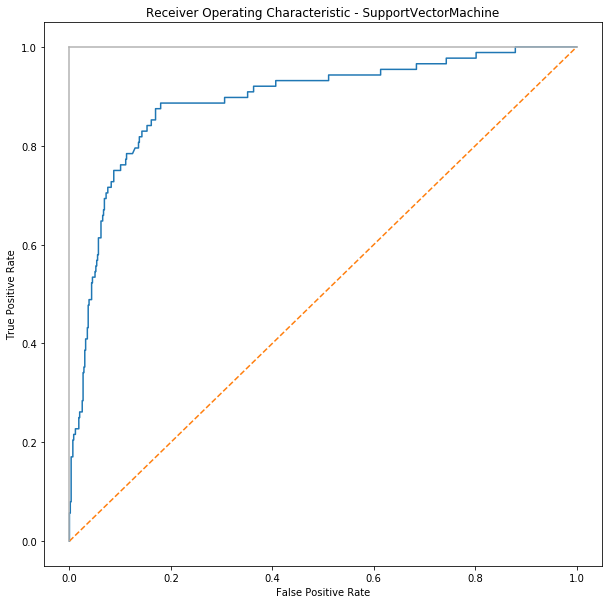

In [40]:
svm = SVC(C=.1,tol=1e-5,probability=True)
svm.fit(X_train_res, y_train_res)
y_model3 = svm.predict(X_test1)
y_model3_proba = svm.predict_proba(X_test1)[:,1]
print('Classification Report: \n')
print(classification_report(y_ts, y_model3))
print('Confusion Matrix: \n')
print(confusion_matrix(y_ts, y_model3))
fpr, tpr, threshold1 = roc_curve(y_ts, y_model3_proba)
print('\nroc_auc_score for SupportVectorMachine: ', roc_auc_score(y_ts, y_model3_proba))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SupportVectorMachine')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       595
           1       0.42      0.83      0.56        88

    accuracy                           0.83       683
   macro avg       0.70      0.83      0.73       683
weighted avg       0.90      0.83      0.85       683

Confusion Matrix: 

[[496  99]
 [ 15  73]]

roc_auc_score for RandomForestClassifier:  0.8978800611153552


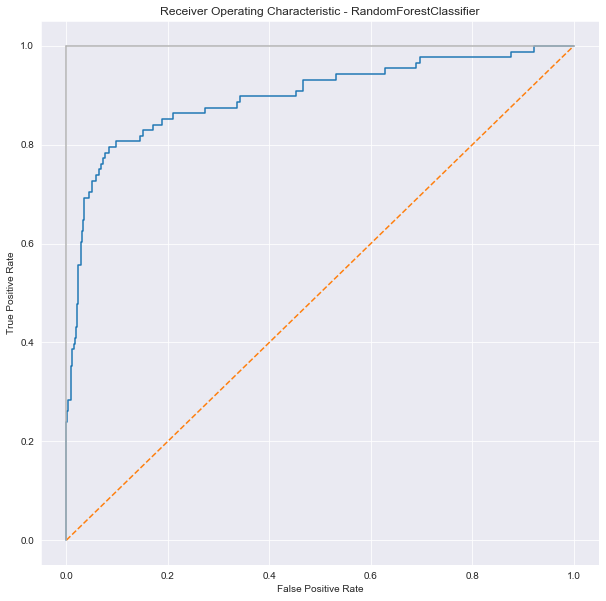

Important Features:


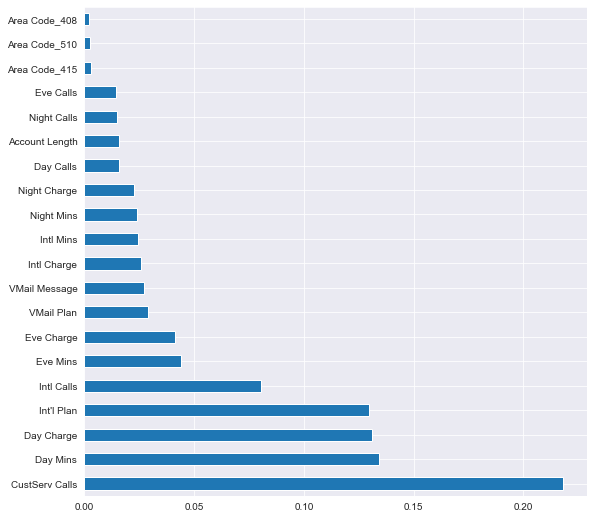

In [282]:
rfc = RandomForestClassifier(n_estimators=360,criterion='gini',min_samples_split=.009)
rfc.fit(X_train_res, y_train_res)
y_model4 = rfc.predict(X_test1)
y_model4_proba = rfc.predict_proba(X_test1)[:,1]
print('Classification Report: \n')
print(classification_report(y_ts, y_model4))
print('Confusion Matrix: \n')
print(confusion_matrix(y_ts, y_model4))
fpr, tpr, threshold1 = roc_curve(y_ts, y_model4_proba)
print('\nroc_auc_score for RandomForestClassifier: ', roc_auc_score(y_ts, y_model4_proba))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Important Features:')
feat_importances = pd.Series(rfc.feature_importances_, index=X_train3.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(9,9))
plt.show()

In [288]:
t=pd.DataFrame({'Features':X_train3.columns,'Feature Importance':rfc.feature_importances_}).head(10).sort_values(by='Feature Importance',ascending=False)

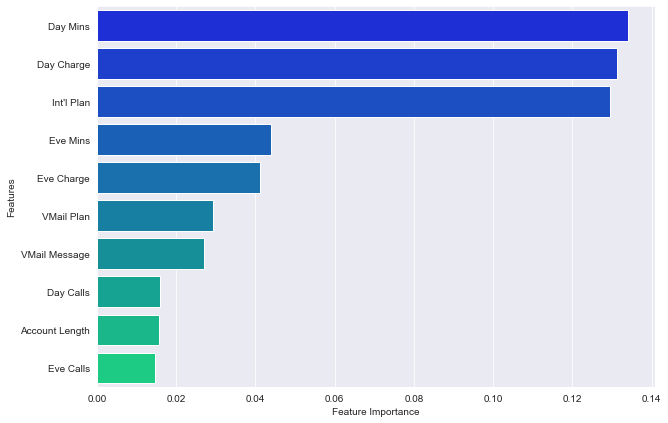

In [294]:
plt.rcParams['figure.figsize']=(10,7)

sns.barplot(data=t,y='Features',x='Feature Importance',palette='winter')

plt.savefig("C:/Users/manra/OneDrive/Desktop/TELA/figure.png")

Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.33      0.50       595
           1       0.18      0.98      0.30        88

    accuracy                           0.41       683
   macro avg       0.58      0.65      0.40       683
weighted avg       0.89      0.41      0.47       683

Confusion Matrix: 

[[197 398]
 [  2  86]]

roc_auc_score for LGBMClassifier:  0.8470970206264324


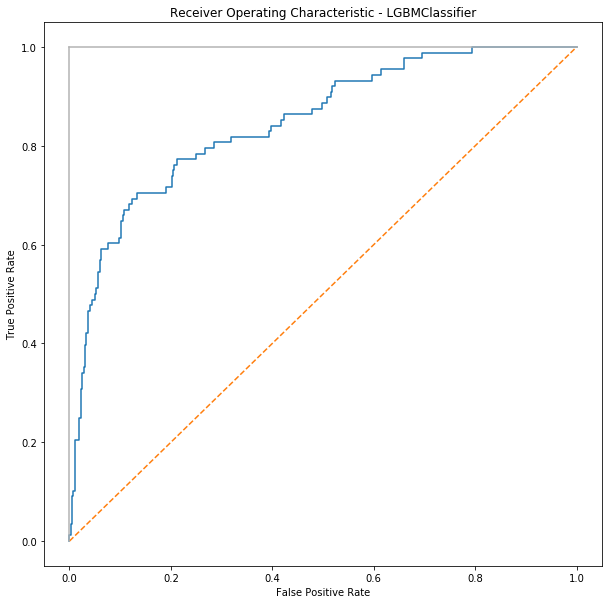

Important Features:


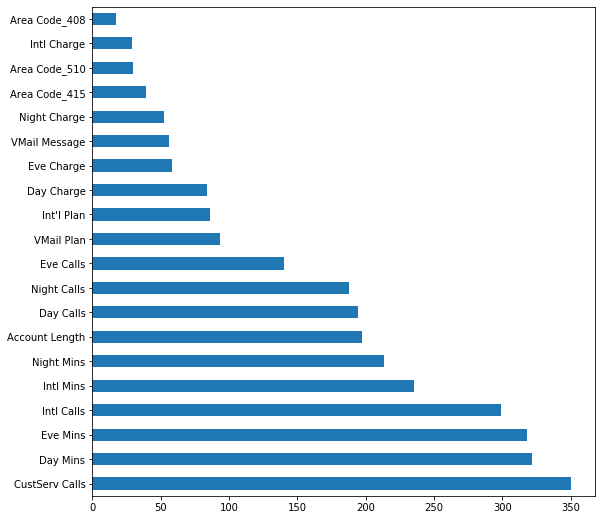

In [42]:
lgbm = LGBMClassifier()
lgbm.fit(X_train_res, y_train_res)
y_model5 = lgbm.predict(X_test1)
y_model5_proba = lgbm.predict_proba(X_test1)[:,1]
print('Classification Report: \n')
print(classification_report(y_ts, y_model5))
print('Confusion Matrix: \n')
print(confusion_matrix(y_ts, y_model5))
fpr, tpr, threshold1 = roc_curve(y_ts, y_model5_proba)
print('\nroc_auc_score for LGBMClassifier: ', roc_auc_score(y_ts, y_model5_proba))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LGBMClassifier')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Important Features:')
feat_importances = pd.Series(lgbm.feature_importances_, index=X_train3.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(9,9))
plt.show()

In [43]:
def processing2(df):
    df = pd.DataFrame(df)
    df = df.drop(columns=['State', 'Phone'])
    df["Int'l Plan"]=le.fit_transform(df["Int'l Plan"])
    df["VMail Plan"]=le.fit_transform(df["VMail Plan"])
    df['Area Code'] = df['Area Code'].astype(str)
    df = pd.get_dummies(df)
    df = mms.fit_transform(df)
    
    return df

In [44]:
X_train2 = processing2(X_train)
X_test2 = processing2(X_test)
sm = SMOTE(random_state=0)
X_train_res2, y_train_res2 = sm.fit_sample(X_train2, y_tr)

Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.70      0.80       595
           1       0.24      0.64      0.35        88

    accuracy                           0.69       683
   macro avg       0.58      0.67      0.57       683
weighted avg       0.84      0.69      0.74       683

Confusion Matrix: 

[[417 178]
 [ 32  56]]

roc_auc_score for NaiveBayesClassifier:  0.7255920550038196


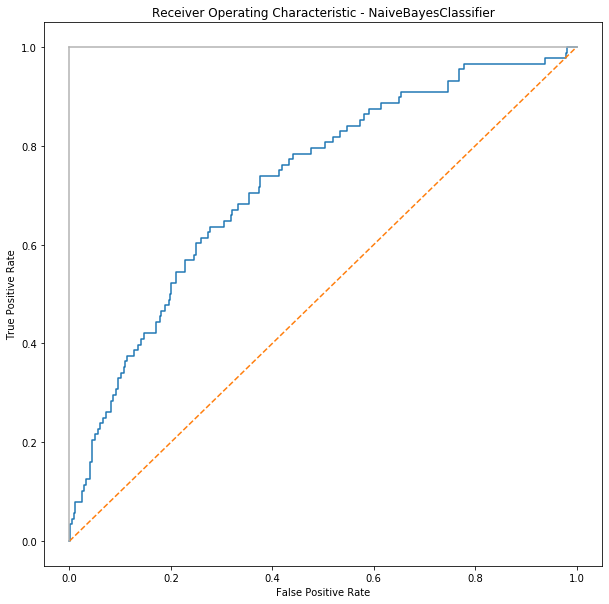

In [45]:
nb = MultinomialNB()
nb.fit(X_train_res2, y_train_res2)
y_model6 = nb.predict(X_test2)
y_model6_proba = nb.predict_proba(X_test2)[:,1]
print('Classification Report: \n')
print(classification_report(y_ts, y_model6))
print('Confusion Matrix: \n')
print(confusion_matrix(y_ts, y_model6))
fpr, tpr, threshold1 = roc_curve(y_ts, y_model6_proba)
print('\nroc_auc_score for NaiveBayesClassifier: ', roc_auc_score(y_ts, y_model6_proba))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - NaiveBayesClassifier')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion: 

## Random Forest Classifier is the best model out of the 6 models tested, as it has the best auc-roc score as well as the best overall Recall for both the minority as well as majority class. So, it can overall correctly predict people who will churn and those who will not churn (better than the other models).

## International Plan, Day Charge, and Customer Service Calls are the important features listed by the model in predicting churn successfully.